<a href="https://colab.research.google.com/github/UEES-IA-Grupo1/UEES-IA-GRUPO1-SEMANA-1/blob/main/04_Deep_Learning_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

!pip install seaborn plotly -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")


# 04 - Introducción a Deep Learning

## 1. Introducción
En este notebook se construye una red neuronal sencilla con TensorFlow/Keras
para resolver un problema de clasificación supervisada.

## 2. Preparación de datos
- Carga del dataset Digits
- Escalamiento y preparación de etiquetas

## 3. Definición del modelo (Keras)
- Arquitectura de la red
- Compilación del modelo

## 4. Entrenamiento y visualización
- Curvas de pérdida y exactitud (loss / accuracy)

## 5. Evaluación del modelo
- Exactitud en test
- Reporte de clasificación

## 6. Conclusiones


## 2. Preparación de datos (Digits)


In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Cargar dataset
digits = load_digits()
X = digits.data          # 64 features (8x8)
y = digits.target        # dígitos 0-9

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

# Escalar datos (opcional pero buena práctica)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encoding para las etiquetas
y_cat = to_categorical(y, num_classes=10)

# División train / test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_cat, test_size=0.2, random_state=42, stratify=y
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shape de X: (1797, 64)
Shape de y: (1797,)
X_train: (1437, 64)
X_test: (360, 64)
y_train: (1437, 10)
y_test: (360, 10)


## 3. Definición del modelo (Keras)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Arquitectura de la red
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')   # 10 clases (dígitos 0-9)
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,570 (25.66 KB)

 Trainable params: 6,570 (25.66 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Entrenamiento y visualización


Entrenamiento finalizado.
Claves disponibles en history: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


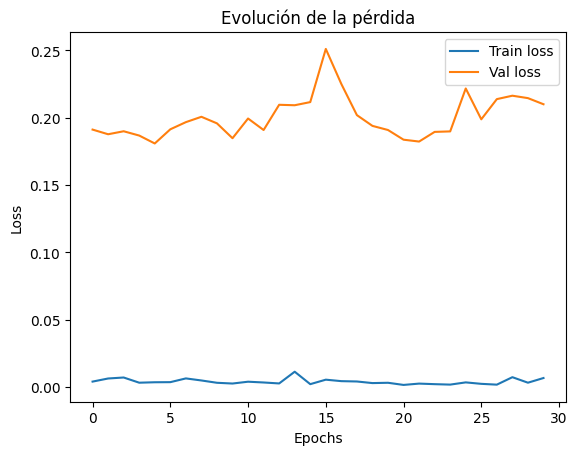

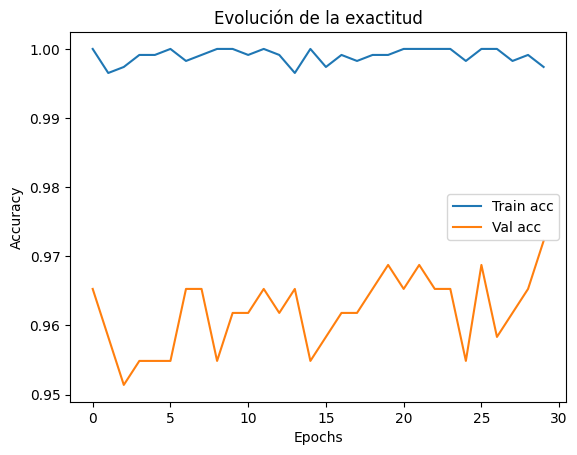

In [9]:
import matplotlib.pyplot as plt

history = model.fit(
    X_train, y_train,
    validation_split=0.2,   # importante para tener val_loss y val_accuracy
    epochs=30,
    batch_size=32,
    verbose=0               # 0 para no saturar la salida
)

print("Entrenamiento finalizado.")
print("Claves disponibles en history:", history.history.keys())


plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Evolución de la pérdida')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evolución de la exactitud
plt.figure()
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title('Evolución de la exactitud')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## 5. Evaluación del modelo


In [12]:
# IMPORTS NECESARIOS
import numpy as np
from sklearn.metrics import classification_report

# EVALUACIÓN DEL MODELO
loss_test, acc_test = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss en test: {loss_test:.4f}")
print(f"Accuracy en test: {acc_test:.4f}")

# PREDICCIONES
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)        # predicción final
y_test_labels = np.argmax(y_test, axis=1)       # etiquetas reales

# REPORTE
print("\nReporte de clasificación:\n")
print(classification_report(y_test_labels, y_pred))


Loss en test: 0.2517
Accuracy en test: 0.9722
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Reporte de clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.97      0.95        36
           2       0.97      1.00      0.99        35
           3       0.95      0.97      0.96        37
           4       0.97      0.97      0.97        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.92      1.00      0.96        36
           8       1.00      0.86      0.92        35
           9       1.00      0.94      0.97        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



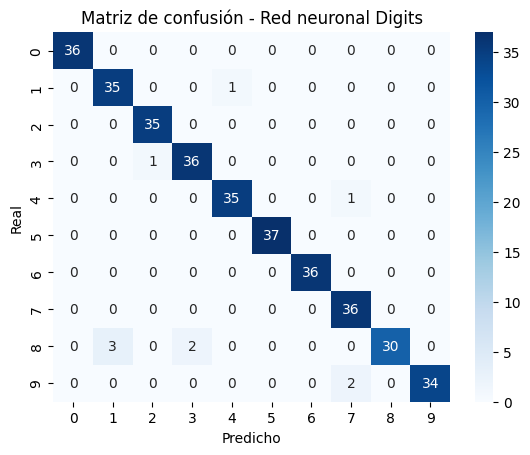

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test_labels, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión - Red neuronal Digits")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


## 6. Conclusiones

En este notebook se construyó una red neuronal densa sencilla para
clasificar dígitos escritos a mano usando el dataset **Digits**.

Puntos clave:
- Se realizó preprocesamiento básico: escalamiento de features y one-hot encoding.
- Se definió una red con capas densas, función de activación ReLU y capa final softmax.
- Se entrenó el modelo con `adam` y `categorical_crossentropy`.
- Se analizaron las curvas de pérdida y exactitud, y se evaluó con accuracy y reporte de clasificación.

Este flujo representa un primer acercamiento a Deep Learning con TensorFlow/Keras
para problemas de clasificación multiclase.
